In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import file as a dataframe, show first 5 cols
df = pd.read_csv("C:\\Users\lyhe\Downloads\MLF_GP1_CreditScore.csv")
df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [3]:
df.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,...,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,...,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,...,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,...,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,...,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,...,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,...,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


                          Sales/Revenues  Gross Margin    EBITDA  \
Sales/Revenues                  1.000000     -0.026318  0.500178   
Gross Margin                   -0.026318      1.000000  0.114092   
EBITDA                          0.500178      0.114092  1.000000   
EBITDA Margin                  -0.124079      0.147886  0.757142   
Net Income Before Extras        0.012024     -0.001061  0.012565   
Total Debt                      0.068938     -0.002665  0.008949   
Net Debt                        0.175741      0.004266  0.119251   
LT Debt                         0.048960     -0.003149 -0.000665   
ST Debt                         0.014987     -0.005417  0.004844   
Cash                           -0.008088     -0.024540 -0.030773   
Free Cash Flow                  0.035716      0.001920  0.009102   
Total Debt/EBITDA               0.056092     -0.005690 -0.009527   
Net Debt/EBITDA                 0.110201     -0.000236  0.074284   
Total MV                        0.123111      0.

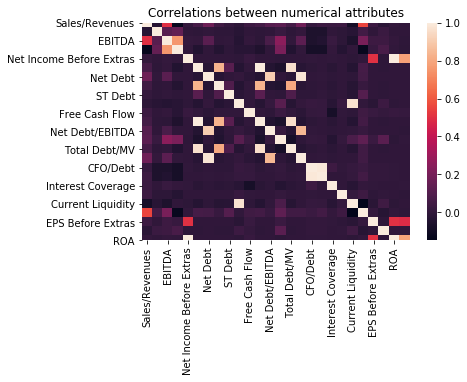

In [4]:
#Correlations between numerical attributes
corr = df.drop(['InvGrd','Rating'],axis = 1).corr()
print(corr)

hm = sns.heatmap(corr,cbar=True,annot=False)
hm.set_title('Correlations between numerical attributes')
plt.show()

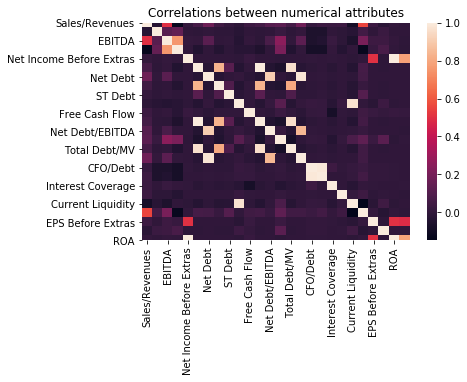

In [5]:
hm = sns.heatmap(corr,cbar=True,annot=False)
hm.set_title('Correlations between numerical attributes')
plt.show()

High correlations betweern certain attributes of the dataset

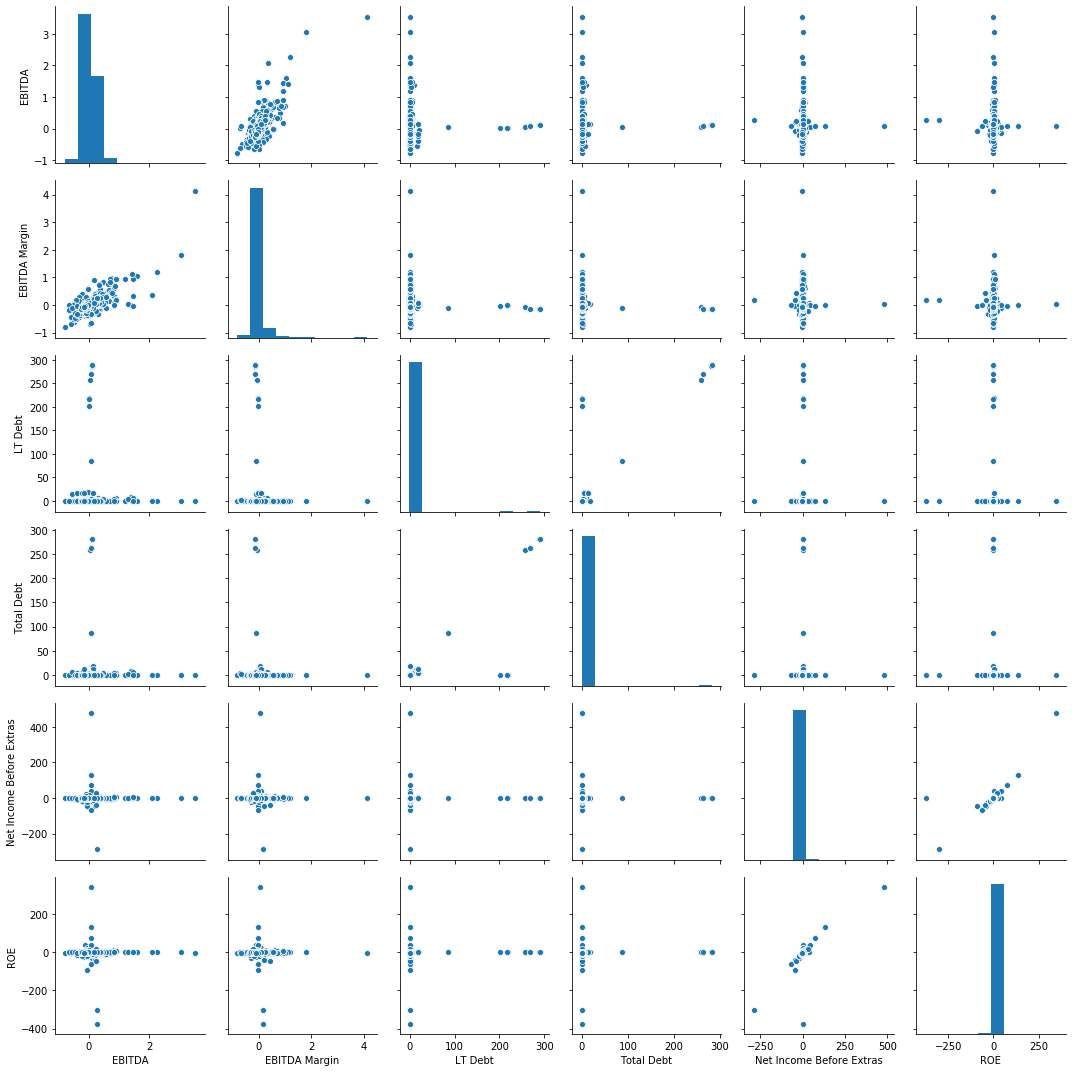

In [6]:
#Plot several attributes with high correlations
cols = ['EBITDA', 'EBITDA Margin', 'LT Debt', 'Total Debt', 'Net Income Before Extras', 'ROE']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

Classification on investment grades(binary classification problem)

In [8]:
#Features, Targets sepearte. Train test split(10% holdout)
X = df.iloc[:, 0:26].values
y = df.iloc[:,26].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, random_state = 12)

In [9]:
#features selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
#Standarize
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

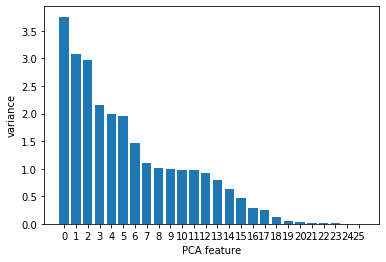

[3.75600984e+00 3.08308708e+00 2.96379678e+00 2.15505421e+00
 1.99677371e+00 1.96337840e+00 1.46917974e+00 1.09417397e+00
 1.01674342e+00 9.94532202e-01 9.84652688e-01 9.69459926e-01
 9.15985695e-01 7.86770125e-01 6.37731087e-01 4.65343713e-01
 2.79172882e-01 2.45891155e-01 1.32001047e-01 4.75596557e-02
 2.48139026e-02 1.42918894e-02 1.04733760e-02 7.20055200e-03
 2.55826428e-03 3.69272142e-04]
26.01700457815566
0.9999999999999999


In [11]:
#PCA
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
print(pca.explained_variance_)
print(sum(pca.explained_variance_))
print(sum(pca.explained_variance_ratio_))

Approximately 18 features with high importance

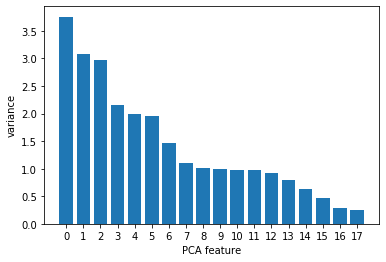

[3.75600984 3.08308708 2.96379678 2.15505421 1.99677371 1.9633784
 1.46917974 1.09417397 1.01674342 0.9945322  0.98465269 0.96945993
 0.9159857  0.78677012 0.63773109 0.46534371 0.27917288 0.24589116]
25.777736619354574
0.99080340098022


In [12]:
pca = PCA(n_components=18)
X_train_pca18 = pca.fit_transform(X_train)
X_test_pca18 = pca.transform(X_test)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
print(pca.explained_variance_)
print(sum(pca.explained_variance_))
print(sum(pca.explained_variance_ratio_))

Fit classification models, using cross_validation for evaluation and grid search for Hyperparameter tuning

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
#1.Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 43)

para_tree = {'criterion':('gini','entropy'),'max_depth':[25, 18, 15, 10, 9, 8, 7]}
clf = GridSearchCV(dt, para_tree, scoring = 'accuracy', cv = 10)
clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'gini', 'max_depth': 8}
0.8


In [18]:
#Use the best parameters
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, random_state=43)
dt.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_pred_dt = dt.predict(X_test)
print(accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

0.8
[[ 23  17]
 [ 17 113]]


Decision tree yields a highest accuracy on test sets of 0.8 when its max_depth = 8

In [22]:
#2 Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()

print(cross_val_score(lr, X_train, y_train, scoring = 'accuracy',cv=10))

[0.74025974 0.78571429 0.75974026 0.78431373 0.74509804 0.75163399
 0.76470588 0.76315789 0.78947368 0.76315789]


C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [23]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(accuracy_score(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))

0.7470588235294118
[[  0  40]
 [  3 127]]


C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
#On PCA transformed features
lr.fit(X_train_pca18, y_train)
y_pred_lr = lr.predict(X_test_pca18)
print(accuracy_score(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))

0.7470588235294118
[[  0  40]
 [  3 127]]


C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
#3.SVM
from sklearn.svm import LinearSVC
svc = LinearSVC()
print(cross_val_score(lr, X_train, y_train, scoring = 'accuracy',cv=10))

[0.74025974 0.78571429 0.75974026 0.78431373 0.74509804 0.75163399
 0.76470588 0.76315789 0.78947368 0.76315789]


C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [26]:
print(cross_val_score(lr, X_train_pca18, y_train, scoring = 'accuracy',cv=10))

[0.74025974 0.78571429 0.75974026 0.78431373 0.74509804 0.76470588
 0.77124183 0.76315789 0.78947368 0.76315789]


C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [28]:
#On test set
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(accuracy_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

0.7470588235294118
[[  1  39]
 [  4 126]]


C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [29]:
svc.fit(X_train_pca18, y_train)
y_pred_svc = svc.predict(X_test_pca18)
print(accuracy_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

0.7529411764705882
[[  0  40]
 [  2 128]]


C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


PCA transformed data yields a higher accuracy

Ensembling: Random forest and Adaboost

In [30]:
#Random forest
estimators = [20, 50, 100 ,200, 500, 1000]
for i in estimators:
    rfr = RandomForestClassifier(n_estimators = i, n_jobs=-1)
    scores = cross_val_score(rfr, X_train, y_train, scoring = "accuracy", cv = 10)
    print(scores.mean(), scores.std() * 1.96)

0.8653604823109469 0.041793527954562905
0.8731823989563928 0.04386510216295114
0.8797144376091746 0.04075287235938085
0.8816923100978828 0.04807195134493343
0.8816880659759917 0.03649566553612143
0.8816881218197008 0.043452611986619726


In [31]:
#Opitimized to 200 estimators
rfr = RandomForestClassifier(n_estimators = 200, n_jobs=-1)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)

print(acc_test)
print(confusion_matrix(y_test, y_pred))

0.8823529411764706
[[ 26  14]
 [  6 124]]


In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
ada = AdaBoostClassifier()
para_ada = {'n_estimators' : [20, 50, 100 ,200, 500, 1000]}
clf_ada = GridSearchCV(ada, para_ada, scoring='accuracy', cv = 10)
clf_ada.fit(X_train, y_train)

print(clf_ada.best_params_)

y_pred_ada = clf_ada.predict(X_test)
print(accuracy_score(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))

{'n_estimators': 500}
0.8058823529411765
[[ 17  23]
 [ 10 120]]


In [34]:
#Fit on PCA
clf_ada.fit(X_train_pca18, y_train)
print(clf_ada.best_params_)
y_pred_ada = clf_ada.predict(X_test_pca18)
print(accuracy_score(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))

{'n_estimators': 100}
0.7470588235294118
[[ 15  25]
 [ 18 112]]


Predict Moody's rating(Multi-Class Problem)

In [35]:
#Get dummies
df_rating = pd.get_dummies(df['Rating'], prefix = 'Rating', drop_first=True)
Y = np.array(df_rating)

X_train, X_test, y_train_rt, y_test_rt = train_test_split(X, Y, train_size = 0.9, random_state = 12)

In [36]:
#1.Decision Tree
dt = DecisionTreeClassifier(random_state=43)
para_tree = {'criterion':('gini','entropy'),'max_depth':[26,18,15,10,9,8,7]}
clf = GridSearchCV(dt, para_tree, scoring = 'accuracy', cv = 10)
clf.fit(X_train, y_train_rt)

print(clf.best_params_)
print(clf.best_score_)

from sklearn.metrics import classification_report

#On test set
y_pred_dt = clf.predict(X_test)
print(accuracy_score(y_test_rt, y_pred_dt))
print(classification_report(y_test_rt, y_pred_dt))

{'criterion': 'gini', 'max_depth': 26}
0.4326797385620915
0.4235294117647059
              precision    recall  f1-score   support

           0       0.20      0.16      0.18        19
           1       0.00      0.00      0.00         1
           2       0.36      0.44      0.40         9
           3       0.44      0.37      0.40        19
           4       0.00      0.00      0.00         0
           5       0.33      0.29      0.31         7
           6       0.25      0.33      0.29         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         0
           9       0.64      0.39      0.48        18
          10       0.50      0.44      0.47         9
          11       0.35      0.30      0.32        20
          12       0.44      0.70      0.54        23
          13       0.71      0.52      0.60        29
          14       0.00      0.00      0.00         0

   micro avg       0.43      0.41      0.42       160
   

C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [39]:
#On PCA
pca = PCA(n_components=18)
X_train_pca18 = pca.fit_transform(X_train)
X_test_pca18 = pca.transform(X_test)

dt = DecisionTreeClassifier(random_state=43)
para_tree = {'criterion':('gini','entropy'),'max_depth':[26,18,15,10,9,8,7]}
clf = GridSearchCV(dt, para_tree, scoring = 'accuracy', cv = 10)
clf.fit(X_train_pca18, y_train_rt)

print(clf.best_params_)
print(clf.best_score_)

from sklearn.metrics import classification_report
print(accuracy_score(y_test_rt, y_pred_dt))
print(classification_report(y_test_rt, y_pred_dt))

{'criterion': 'gini', 'max_depth': 26}
0.4091503267973856
0.4235294117647059
              precision    recall  f1-score   support

           0       0.20      0.16      0.18        19
           1       0.00      0.00      0.00         1
           2       0.36      0.44      0.40         9
           3       0.44      0.37      0.40        19
           4       0.00      0.00      0.00         0
           5       0.33      0.29      0.31         7
           6       0.25      0.33      0.29         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         0
           9       0.64      0.39      0.48        18
          10       0.50      0.44      0.47         9
          11       0.35      0.30      0.32        20
          12       0.44      0.70      0.54        23
          13       0.71      0.52      0.60        29
          14       0.00      0.00      0.00         0

   micro avg       0.43      0.41      0.42       160
   

C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [40]:
#2.Logistic Regression
#Use origninal label as targets as LR can not handle multilabel matrix

y_label = df.iloc[:,27]
X_train, X_test, y_train_label, y_test_label = train_test_split(X, y_label, train_size = 0.9, random_state = 12)

In [41]:
lr = LogisticRegression(multi_class = 'auto')
print(cross_val_score(lr, X_train, y_train_label, scoring = 'accuracy',cv=10))

C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solv

[0.21875    0.2125     0.19745223 0.2        0.20779221 0.22368421
 0.21854305 0.28378378 0.24324324 0.22758621]


In [42]:
lr.fit(X_train,y_train_label)
y_pred_lr = lr.predict(X_test)
print(accuracy_score(y_test_label, y_pred_lr))
print(classification_report(y_test_label, y_pred_lr))

C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.17058823529411765
              precision    recall  f1-score   support

          A1       0.00      0.00      0.00        10
          A2       0.40      0.11      0.17        19
          A3       0.00      0.00      0.00         1
         Aa2       0.00      0.00      0.00         9
         Aa3       0.00      0.00      0.00        19
          B1       0.00      0.00      0.00         7
          B2       0.00      0.00      0.00         3
          B3       0.00      0.00      0.00         3
         Ba2       0.00      0.00      0.00        18
         Ba3       0.00      0.00      0.00         9
        Baa1       0.57      0.20      0.30        20
        Baa2       0.14      0.87      0.25        23
        Baa3       0.38      0.10      0.16        29

    accuracy                           0.17       170
   macro avg       0.11      0.10      0.07       170
weighted avg       0.20      0.17      0.11       170



C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
#Random forest
X_train, X_test, y_train_rt, y_test_rt = train_test_split(X, Y, train_size = 0.9, random_state = 12)

In [44]:
estimators = [20, 50, 100 ,200, 500]
for i in estimators:
    rfr = RandomForestClassifier(n_estimators = i, n_jobs=-1)
    scores = cross_val_score(rfr, X_train, y_train_rt, scoring = "accuracy", cv = 10)
    print(scores.mean(), scores.std() * 1.96)

0.2666666666666667 0.07219462874527197
0.2660130718954249 0.04289112591353606
0.26993464052287586 0.06682345269871937
0.273202614379085 0.053375198229750745
0.2712418300653595 0.05933053831828092


In [45]:
rfr = RandomForestClassifier(n_estimators = 200, n_jobs=-1)
rfr.fit(X_train, y_train_rt)
y_pred_rfr = rfr.predict(X_test)

print(accuracy_score(y_test_rt, y_pred_rfr))
print(classification_report(y_test_rt, y_pred_rfr))

0.2529411764705882
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00         1
           2       1.00      0.22      0.36         9
           3       1.00      0.21      0.35        19
           4       0.00      0.00      0.00         0
           5       1.00      0.14      0.25         7
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         0
           9       0.86      0.33      0.48        18
          10       1.00      0.22      0.36         9
          11       1.00      0.10      0.18        20
          12       1.00      0.26      0.41        23
          13       1.00      0.31      0.47        29
          14       0.00      0.00      0.00         0

   micro avg       0.97      0.21      0.34       160
   macro avg       0.59      0.14      0.22       160
weighte

C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [46]:
#On PCA
pca = PCA(n_components=18)
X_train_pca18 = pca.fit_transform(X_train)
X_test_pca18 = pca.transform(X_test)

rfr = RandomForestClassifier(n_estimators = 200, n_jobs=-1)
rfr.fit(X_train_pca18, y_train_rt)
y_pred_rfr = rfr.predict(X_test_pca18)

print(accuracy_score(y_test_rt, y_pred_rfr))
print(classification_report(y_test_rt, y_pred_rfr))

0.21764705882352942
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00         1
           2       1.00      0.44      0.62         9
           3       1.00      0.16      0.27        19
           4       0.00      0.00      0.00         0
           5       1.00      0.14      0.25         7
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         0
           9       1.00      0.11      0.20        18
          10       1.00      0.11      0.20         9
          11       1.00      0.10      0.18        20
          12       0.88      0.30      0.45        23
          13       1.00      0.24      0.39        29
          14       0.00      0.00      0.00         0

   micro avg       0.93      0.17      0.29       160
   macro avg       0.59      0.13      0.20       160
weight

C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\lyhe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


PCA gives a worse result.
As a ensembled algo its performance is not as good as the base estimater, which is decision tree, on the same input. 